##Image Compression -->pca +k-means clustering:





---



In [44]:
from google.colab import files
uploaded=files.upload()

Saving india.jpg to india (1).jpg


Load the Image ⏩

---



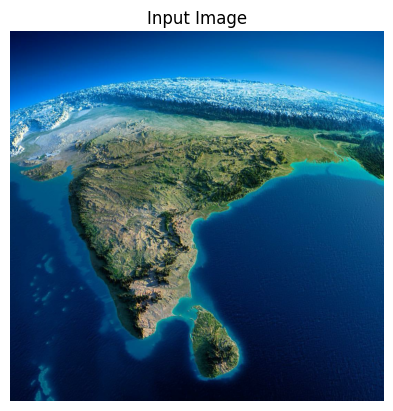

In [45]:
from PIL import Image
import matplotlib.pyplot as plt

img=Image.open("india.jpg")
plt.title("Input Image")
plt.imshow(img)
plt.axis("off")
plt.show()

Flatten the image
(convert 3D to 2D)

---

why 2D ?   - Each row represents a pixel and
Each column represents a color channel (R, G, B)

In [46]:
import numpy as np
#input image
img_np=np.array(img)
print("Og_Image shape:",img_np.shape)
if img_np.shape[-1]==4:       #converting RGBA to RGB if alpha channel exists
  img_np=img_np[:,:,:3]


#flattening image
pxl=img_np.reshape(-1,3)
print("Fl_Image shape:",pxl.shape)        #(n_samples,n_features)


Og_Image shape: (1068, 1080, 4)
Fl_Image shape: (1153440, 3)


Normalize the image :

---

Converts pixel values from the standard 0–255 range (uint8) to float values between 0 and 1.

This normalizes the RGB channels so each has equal influence.

In [47]:
pxl_scaled=pxl/255.0
pxl_scaled

array([[0.        , 0.04313725, 0.27058824],
       [0.        , 0.04313725, 0.27058824],
       [0.        , 0.04313725, 0.27058824],
       ...,
       [0.00392157, 0.10196078, 0.2627451 ],
       [0.00392157, 0.10196078, 0.2627451 ],
       [0.        , 0.09803922, 0.25882353]])

PCA for dimensionality reduction:

---



Why PCA ?
 PCA captures the most important color variance, reducing less significant noise.  Clustering in 2D is faster than in 3D.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pxl_pca=pca.fit_transform(pxl_scaled)
print("Reduced shape:",pxl_pca.shape)

Reduced shape: (1153440, 2)


Visualizing the PCA components:



---



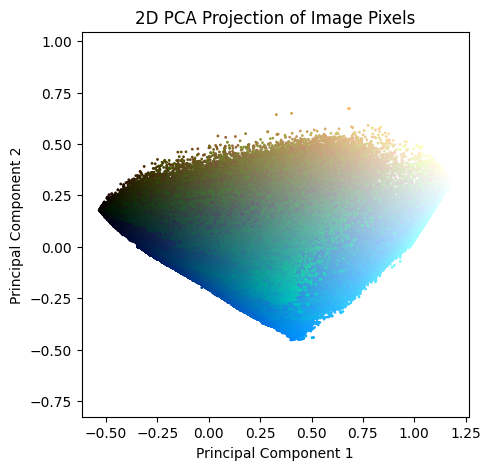

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(pxl_pca[:, 0], pxl_pca[:, 1], c=pxl_scaled, s=1)

plt.title("2D PCA Projection of Image Pixels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axis('equal')
plt.show()


In [49]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
# percentile of the retained information for the 1st and 2nd PC component

print("Total variance retained:", sum(pca.explained_variance_ratio_))
# total percentile of the retained information after PCA


Explained variance ratio: [0.75284181 0.23313481]
Total variance retained: 0.9859766124508692


Applying K-Means Clustering

---



In [50]:
from sklearn.cluster import KMeans
k=8
model=KMeans(n_clusters=k,random_state=42)
model.fit(pxl_pca)

KMeans(random_state=42)

Reconstructing the image

---





In [51]:
#find the centers for the cluster
centers_pca = model.cluster_centers_                    #  Get cluster centers in PCA space
centers_rgb = pca.inverse_transform(centers_pca)        #  Convert cluster centers back to RGB color space


centers_rgb = (centers_rgb * 255).astype('uint8')                    # Convert float to integer format

In [52]:
label=model.labels_  #get labels for each pixel
label[:5]

array([2, 2, 2, 2, 2], dtype=int32)

In [53]:
compressed_pxl=centers_rgb[label]     #replace each pixel
compressed_img=compressed_pxl.reshape(img_np.shape)   #reshape back to input image

In [55]:
unique_colors = np.unique(pxl, axis=0)
total_colors= len(unique_colors)

print("Total unique colors in the image: ",total_colors)

Total unique colors in the image:  222051


Visualizing the images:

---



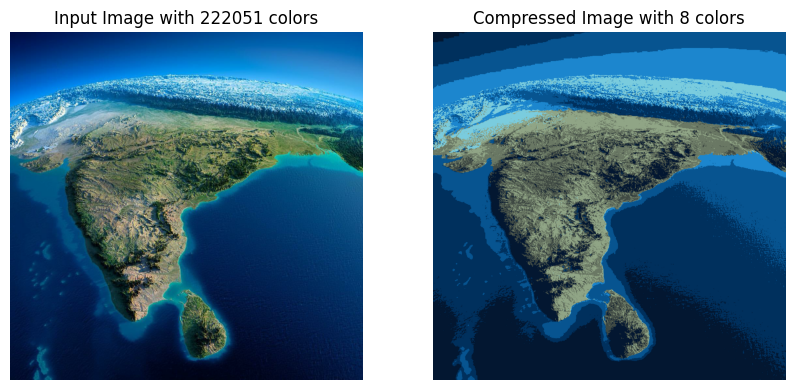

In [56]:
#compare the images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title(f"Input Image with {total_colors} colors")
plt.imshow(img_np)
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Compressed Image with {k} colors")
plt.imshow(compressed_img)
plt.axis('off')

plt.show()